In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_excel('./data/Book.xlsx')

In [3]:
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//600) 
    
data['minute'] = mins

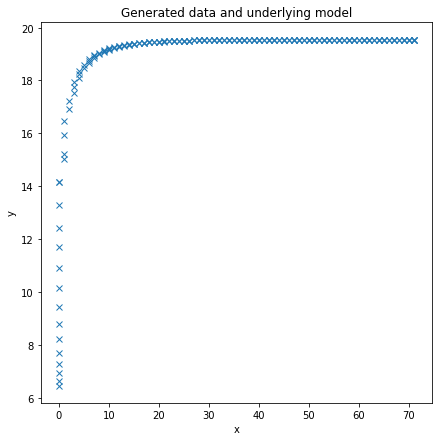

In [12]:
#print(data)
#x = data[data['minute'] == 0]['Temperature']
#y = data[data['minute'] == 0]['V(vref)']
x = data[data['Temperature'] == 65]['minute']
y = data[data['Temperature'] == 65]['V(vref)']

temp = np.array(data['Temperature'])
time = np.array(data['minute'])
#y = data[data[]]
#fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
#ax.plot(data['time'], data['V(vref)'], 'x', label='sampled data')
#ax.plot(x, true_regression_line, label='true regression line', lw=2.)
#plt.legend(loc=0);
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')

In [ ]:
model_isfet = pm.Model()
'''
with model_isfet:
    mu_a = pm.Uniform('mu_a',0,20)
    sd_a = pm.Uniform('sd_a',0,20)
    mu_b = pm.Uniform('mu_b',0,20)
    sd_b = pm.Uniform('sd_b',0,20)
    alpha = pm.Normal('alpha', mu=mu_a, sigma=sd_a)
    beta = pm.Normal('beta', mu=mu_b, sigma=sd_b)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu=alpha*temp + beta*time + epsilon, sigma=sd_vref,observed=y)
    trace = sample(3000, cores=2)
'''
with model_isfet:
    alpha = pm.Uniform('alpha',0,50)
    beta = pm.Uniform('beta',0,50)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu= 20-np.exp(alpha-beta*x), sigma=sd_vref,observed=y)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(120000, step=step, start=start)    

C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -17,749, ||grad|| = 0.0021472: 100%|█████████████████████████████████████████████| 82/82 [00:01<00:00, 70.51it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains:   5%|██▊                                                 | 25592/482000 [04:04<1:18:40, 96.68draws/s]

In [75]:
trace
'''
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
'''

NameError: name 'trace' is not defined

In [48]:
true_slope

2